In [1]:
import numpy as np

In [2]:
X = np.array([[1, 2], [2, 3], [3, 1], [2, 5], [4, 3]])
Y = np.array([1, 1, 1, 0, 0])

X = np.hstack((np.ones((X.shape[0], 1)), X))
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 1.],
       [1., 2., 5.],
       [1., 4., 3.]])

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
def loss(theta, X, Y):
    L = 0
    for x, y in zip(X, Y):
        if y == 0:
            L += - np.log(1 - sigmoid(np.dot(theta, x)))
        else:
            L += - np.log(sigmoid(np.dot(theta, x)))
    return L / len(Y)

In [5]:
def gradient(theta, X, Y):
    G = 0
    for x, y in zip(X, Y):
        G += (sigmoid(np.dot(theta, x)) - y) * x
    return G / len(Y)

In [7]:
# Phương pháp hướng giảm
initial_theta = np.zeros(X.shape[1])
learning_rate = 0.1
tolerance = 1e-5
max_iters = 1e4

theta = initial_theta
num_iters = 0
loss_history = [loss(theta)]
while True:
    num_iters += 1
    theta -= learning_rate * gradient(theta)
    loss_history.append(loss(theta))
    if np.linalg.norm(gradient(theta)) < tolerance or num_iters == max_iters:
        break

In [8]:
num_iters

10000

In [9]:
theta

array([16.53152849, -2.87476042, -2.8147178 ])

In [10]:
loss_history

[0.6931471805599453,
 0.6884995983802987,
 0.6848028811014719,
 0.6815284605984279,
 0.6784789164027372,
 0.6755775474689016,
 0.6727918757191059,
 0.6701058456444671,
 0.6675096905830666,
 0.6649962195402648,
 0.6625594430623241,
 0.6601940533881605,
 0.6578952176198112,
 0.6556584862884351,
 0.6534797450710774,
 0.6513551832134336,
 0.6492812689549556,
 0.6472547283721637,
 0.6452725262913596,
 0.6433318487372316,
 0.6414300866806036,
 0.6395648209566174,
 0.637733808264412,
 0.6359349681747776,
 0.6341663710791651,
 0.632426227017539,
 0.630712875325796,
 0.6290247750465112,
 0.627360496049784,
 0.6257187108139481,
 0.6240981868188953,
 0.6224977795076695,
 0.620916425774835,
 0.6193531379428449,
 0.6178069981902639,
 0.6162771533981865,
 0.6147628103835553,
 0.6132632314903155,
 0.6117777305114422,
 0.6103056689168375,
 0.6088464523639494,
 0.6073995274696757,
 0.60596437882372,
 0.6045405262250668,
 0.6031275221246223,
 0.6017249492583573,
 0.6003324184564833,
 0.5989495666152982,

In [11]:
x_pred = np.array([1, 1, 4])

In [12]:
prob_pred = sigmoid(np.dot(theta, x_pred))
prob_pred

0.9166667880211175

In [13]:
y_pred = 1 if prob_pred >= 0.5 else 0
y_pred

1

In [14]:
a = - theta[1] / theta[2]
b = - theta[0] / theta[2]
a, b

(-1.02133166457951, 5.873245437301719)

In [15]:
import matplotlib.pyplot as plt

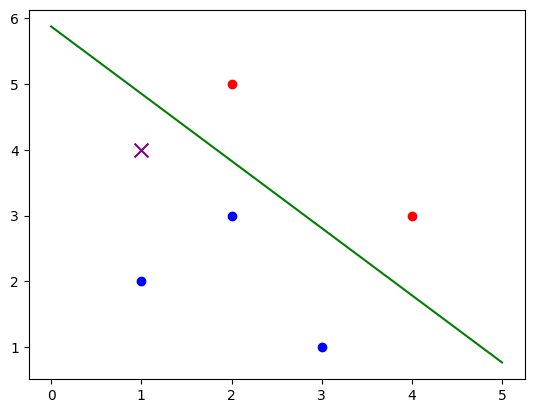

In [16]:
plt.figure()
plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 2], color = 'blue')
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 2], color = 'red')
plt.scatter(x_pred[1], x_pred[2], color = 'purple', marker = 'x', s=100)


X1 = np.linspace(0, 5, 100)
X2 = a*X1 + b
plt.plot(X1, X2, color = 'green')
plt.show()